In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Datasets/diabetes_new.csv'
data = pd.read_csv(data_path)


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(cm)

print(classification_report(y_test, y_pred))

[[1618  155]
 [ 449 1295]]
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84      1773
         1.0       0.89      0.74      0.81      1744

    accuracy                           0.83      3517
   macro avg       0.84      0.83      0.83      3517
weighted avg       0.84      0.83      0.83      3517



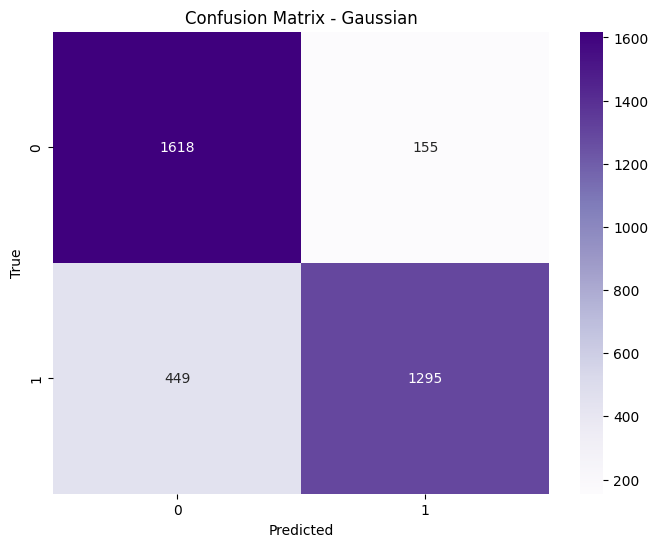

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Gaussian')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
classifier2 = BernoulliNB()
classifier2.fit(X_train, np.ravel(y_train))
y_pred2 = classifier2.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred2)

print(cm)
print(classification_report(y_test, y_pred2))

[[1325  448]
 [ 696 1048]]
              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70      1773
         1.0       0.70      0.60      0.65      1744

    accuracy                           0.67      3517
   macro avg       0.68      0.67      0.67      3517
weighted avg       0.68      0.67      0.67      3517



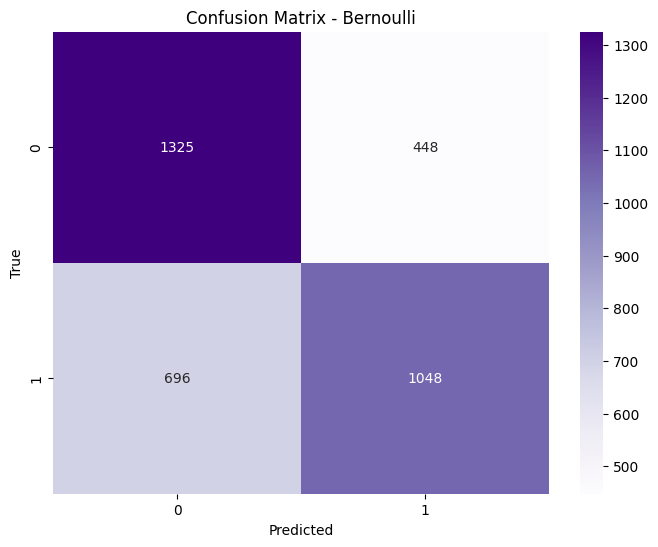

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Bernoulli')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[[1531  242]
 [ 984  760]]
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71      1773
         1.0       0.76      0.44      0.55      1744

    accuracy                           0.65      3517
   macro avg       0.68      0.65      0.63      3517
weighted avg       0.68      0.65      0.63      3517



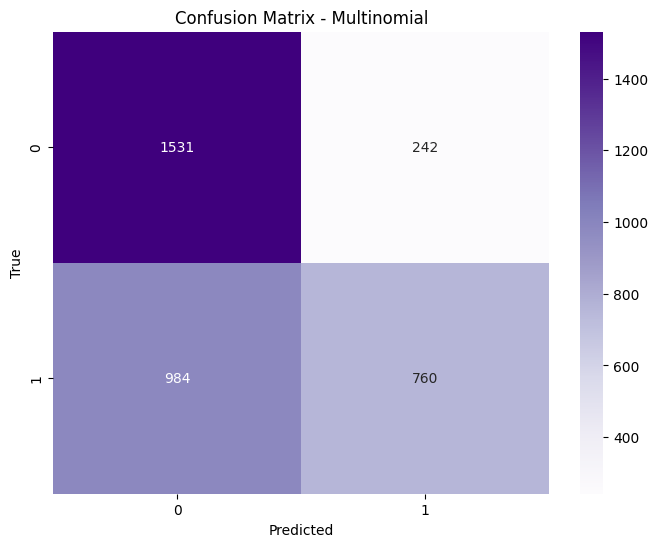

In [ ]:
classifier3 = MultinomialNB()
classifier3.fit(X_train, np.ravel(y_train))
y_pred3 = classifier3.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred3)

print(cm)
print(classification_report(y_test, y_pred3))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Multinomial')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'priors': [0.3, 0.7], 'var_smoothing': 1e-06}
Best F1-score: 0.8477781727692854

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1773
         1.0       0.88      0.81      0.84      1744

    accuracy                           0.85      3517
   macro avg       0.85      0.85      0.85      3517
weighted avg       0.85      0.85      0.85      3517



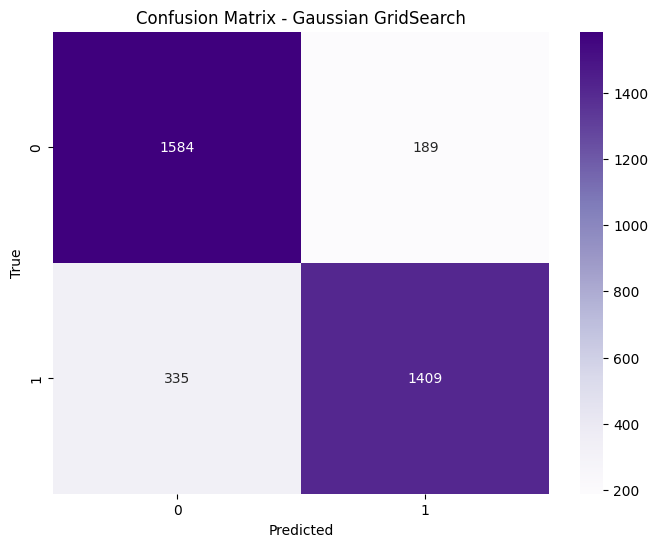

In [ ]:
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [
        None,
        [0.5, 0.5],
        [0.7, 0.3],
        [0.3, 0.7]
    ]
}


grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Gaussian GridSearch')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ROC AUC Skoru: 0.9257


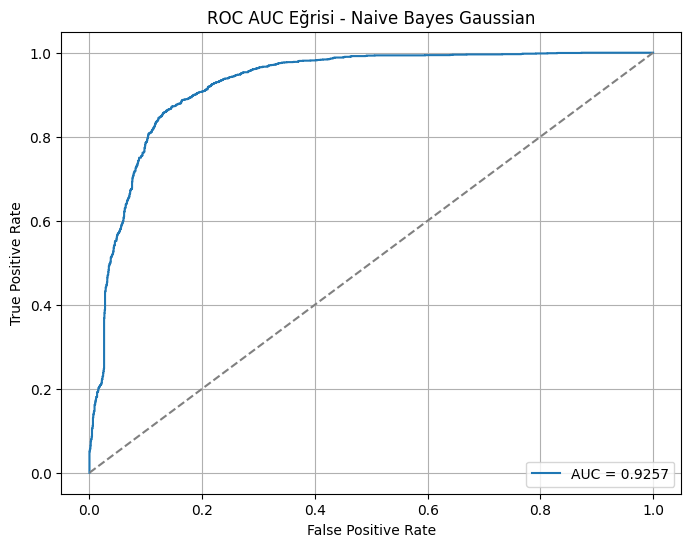

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_scores = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


auc_score = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Skoru: {auc_score:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Eğrisi - Naive Bayes Gaussian')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'alpha': 1.0, 'binarize': 0.5, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Best F1-score: 0.8149306789904017

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1773
         1.0       0.83      0.81      0.82      1744

    accuracy                           0.82      3517
   macro avg       0.82      0.82      0.82      3517
weighted avg       0.82      0.82      0.82      3517



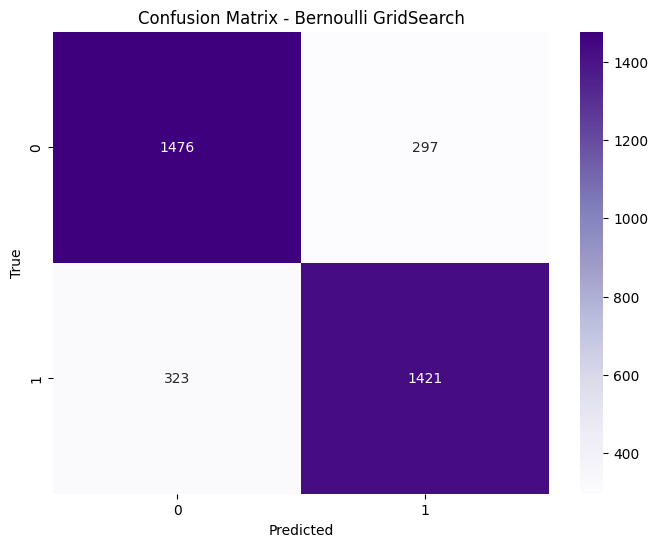

In [ ]:
bnb = BernoulliNB()

param_grid_bnb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'force_alpha': [True, False],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]]
}


grid_search = GridSearchCV(
    estimator=bnb,
    param_grid=param_grid_bnb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Bernoulli GridSearch')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'alpha': 0.01, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}
Best F1-score: 0.6533238535371491

Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.86      0.71      1773
         1.0       0.76      0.44      0.55      1744

    accuracy                           0.65      3517
   macro avg       0.68      0.65      0.63      3517
weighted avg       0.68      0.65      0.63      3517



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


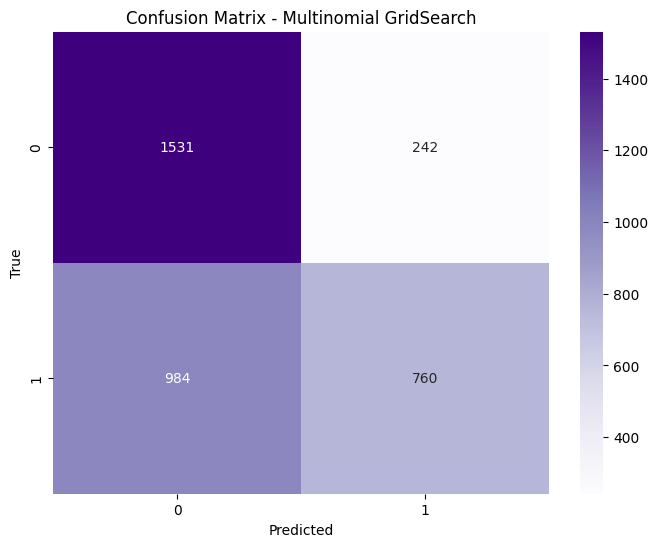

In [ ]:
mnb = MultinomialNB()


param_grid_mnb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],
    'force_alpha': [True, False],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]]
}


grid_search = GridSearchCV(
    estimator=mnb,
    param_grid=param_grid_mnb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Multinomial GridSearch')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()